# Build 5 CSV files:
## census tracts used (i.e., with businesses in the city of SD in them)
## labels (i.e., median number of days businesses have been open in each tract)
## scaled labels (i.e., "score" from 1 to 100)
## features for each census tract
## scaled features (using median and stddev of each feature)

In [124]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing

%matplotlib inline

In [125]:
# define extra bit for filenames, in case of only using one NAICS code
extra = ''
code = 62
extra = '_'+str(code)

## Labels

In [126]:
# read in labels (i.e., business info)
bus = pd.read_csv('data_final/sd_active_businesses_cleaned.csv')
print len(bus)
# use only businesses with a given simple NAICS code
bus = bus.loc[bus.naics_code_simple==code]
#bus.loc[bus.census_tract==18802]
#bus.loc[bus.census_tract==17403]
print len(bus)

56710
4262


In [127]:
# get median days since creation for each tract
tracts_age = bus.groupby('census_tract').median().days_since_creation
tracts = tracts_age.index
median_days_open = tracts_age.values
# save number of census tracts with businesses (i.e., examples)
n_examples = len(median_days_open)
print n_examples

260


In [128]:
# save # of businesses in each tract
n_bus = bus.groupby('census_tract').count().account_key

In [129]:
# write unscaled labels (median days businesses have been open in each tract) to csv
np.savetxt('data_final/labels'+extra+'.csv', median_days_open, fmt='%.1f')
# write list of census tracts used to csv
np.savetxt('data_final/tracts_used'+extra+'.csv', tracts, fmt='%i')

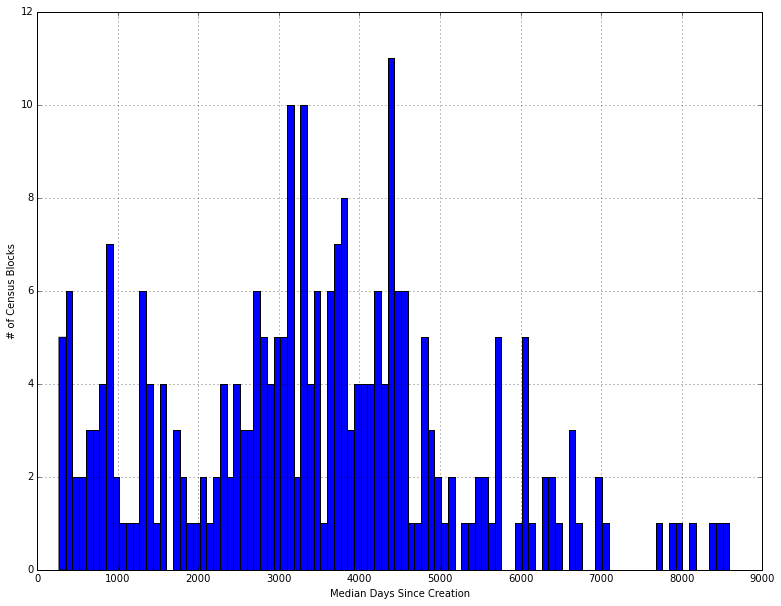

In [130]:
# plot histogram of median days since creation
plt.figure(figsize=(13, 10))
tracts_age.hist(bins=100)
plt.xlabel('Median Days Since Creation')
plt.ylabel('# of Census Blocks')

38.0329960974
37.9177686944
21.7290503972


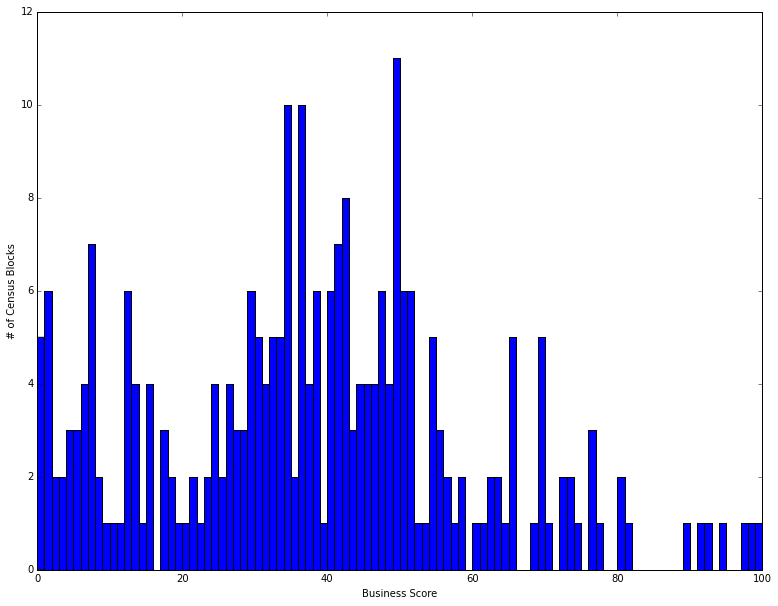

In [131]:
# feature scale min,max to 1,100
score = 100*((median_days_open - np.min(median_days_open)) / \
             (np.max(median_days_open) - np.min(median_days_open)))
# plot new histogram
plt.figure(figsize=(13, 10))
plt.hist(score,bins=100)
plt.xlabel('Business Score')
plt.ylabel('# of Census Blocks')
print np.mean(score)
print np.median(score)
print np.std(score)

In [132]:
# write scaled labels (i.e., scores) from 1 to 100
np.savetxt('data_final/labels_scaled'+extra+'.csv', score, fmt='%.1f')

## Features

In [133]:
# read in features
popl = pd.read_csv('data_final/sd_population_cleaned.csv')
fin = pd.read_csv('data_final/sd_housing_employment_income_cleaned.csv')
parking_meters = pd.read_csv('data_final/sd_parking_meters_cleaned.csv')

# choose which features to use (per census tract)
    # population (population)
    # population_percent_male
    # population_percent_female
    # age_med (median age)
    # age_med_male (median male age)
    # age_med_female (median female age)
    # minor_percent (percenage under 18)
    # adult_percent (percentage over 18)
    # homes (number of homes)
    # homes_percent_mortgage (percentage of homes owne w/ mortgage)
    # homes_percent_clear (percentage of homes owned free & clear)
    # homes_percent_rent (percentage of homes rented)
    # employment_percent (employment percentage)
    # income_med (median income)
    # income_med_owner (median income for owned homes)
    # income_med_renter (median income for rented homes)
    # cost_med (median housing cost)
    # cost_med_owner (median cost for owned homes)
    # cost_med_renter (median cost for rented homes)
    # total_amount (parking meters)
    # n_business (number of businesses)
n_features = 21

In [134]:
# intialize features matrix (number of businesses by number of features)
features = np.zeros((n_examples,n_features))
# go through each business
for i in range(0,n_examples):
    
    # keep track of which feature we're saving
    feature_num = 0

    # get features from population info
    spot = popl.loc[popl.census_tract==tracts[i]]
    # make sure we got 1 and only 1 matching row
    if len(spot) == 1:
        # total population
        features[i,feature_num] = spot.population.to_string(index=False)
        feature_num += 1
        # percent pop male
        features[i,feature_num] = spot.population_percent_male.to_string(index=False)
        feature_num += 1
        # percent pop female
        features[i,feature_num] = spot.population_percent_female.to_string(index=False)
        feature_num += 1
        # median age
        features[i,feature_num] = spot.age_med.to_string(index=False)
        feature_num += 1
        # median age male
        features[i,feature_num] = spot.age_med_male.to_string(index=False)
        feature_num += 1
        # median age male
        features[i,feature_num] = spot.age_med_male.to_string(index=False)
        feature_num += 1
        # percentage under 18
        features[i,feature_num] = spot.minor_percent.to_string(index=False)
        feature_num += 1
        # percentage over 18
        features[i,feature_num] = spot.adult_percent.to_string(index=False)
        feature_num += 1
    else:
        print("***PROBLEM getting population info for census tract %s" % str(tract))
        # account for all features missed above
        feature_num += 8

    # get features from housing, employment, income info
    spot = fin.loc[fin.census_tract==tracts[i]]
    # make sure we got 1 and only 1 matching row
    if len(spot) == 1:
        # total number of housing units
        features[i,feature_num] = spot.homes.to_string(index=False)
        feature_num += 1
        # percentage of housing units owned w/ mortgage
        features[i,feature_num] = spot.homes_percent_mortgage.to_string(index=False)
        feature_num += 1
        # percentage of housing units owned free & clear
        features[i,feature_num] = spot.homes_percent_clear.to_string(index=False)
        feature_num += 1
        # percentage of housing units rented
        features[i,feature_num] = spot.homes_percent_rent.to_string(index=False)
        feature_num += 1
        # percent population in labor force
        features[i,feature_num] = spot.employment_percent.to_string(index=False)
        feature_num += 1
        # median annual household income
        features[i,feature_num] = spot.income_med.to_string(index=False)
        feature_num += 1
        # median annual household income for owned houses
        features[i,feature_num] = spot.income_med_owner.to_string(index=False)
        feature_num += 1
        # median annual household income for rented houses
        features[i,feature_num] = spot.income_med_renter.to_string(index=False)
        feature_num += 1
        # median monthly housing cost
        features[i,feature_num] = spot.cost_med.to_string(index=False)
        feature_num += 1
        # median monthly housing cost for owned homes
        features[i,feature_num] = spot.cost_med_owner.to_string(index=False)
        feature_num += 1
        # median monthly housing cost for rented homes
        features[i,feature_num] = spot.cost_med_renter.to_string(index=False)
        feature_num += 1
    else:
        print("***PROBLEM getting financial info for census tract %s" % str(tract))        
        # account for all features missed above
        feature_num += 11

    # get features from parking meter info
    spot = parking_meters.loc[parking_meters.census_tract==tracts[i]]
    # make sure we got 1 and only 1 matching row
    if len(spot) == 1:
        # total amount spent on parking meters
        features[i,feature_num] = spot.total_amount.to_string(index=False)
        feature_num += 1
    else:
        #print("***PROBLEM getting parking meter info for census tract %s" % str(tract))        
        # total amount spent on parking meters
        feature_num += 1

    # number of businesses in census tract
    features[i,feature_num] = n_bus[n_bus.index==tracts[i]].values[0]
    feature_num += 1

print features.shape
features[:5]

(260, 21)


array([[  3.02900000e+03,   5.01155000e-01,   4.98845000e-01,
          5.03000000e+01,   4.98000000e+01,   4.98000000e+01,
          1.81248000e-01,   8.18752000e-01,   1.39700000e+03,
          5.89000000e+01,   2.31000000e+01,   1.80000000e+01,
          5.46000000e+01,   1.06406000e+05,   1.15066000e+05,
          2.78130000e+04,   1.89500000e+03,   1.92300000e+03,
          1.83900000e+03,   0.00000000e+00,   8.00000000e+00],
       [  1.80100000e+03,   4.69184000e-01,   5.30816000e-01,
          4.65000000e+01,   4.55000000e+01,   4.55000000e+01,
          1.31038000e-01,   8.68962000e-01,   1.04700000e+03,
          3.41000000e+01,   1.11000000e+01,   5.48000000e+01,
          6.92000000e+01,   9.79760000e+04,   1.57500000e+05,
          4.28910000e+04,   1.33800000e+03,   2.24300000e+03,
          9.74000000e+02,   4.16177300e+06,   1.70000000e+01],
       [  4.20800000e+03,   5.06416000e-01,   4.93584000e-01,
          3.96000000e+01,   4.00000000e+01,   4.00000000e+01,
      

In [135]:
# write features to csv
np.savetxt('data_final/features'+extra+'.csv', features, fmt='%.3f', delimiter=',')

In [136]:
# feature scale to median and stddev
features_scaled = (features-np.mean(features,axis=0))/np.std(features,axis=0)
print np.mean(features,axis=0)
print np.std(features,axis=0)
print features_scaled.shape
features_scaled[:5]

[  4.81473077e+03   5.02309935e-01   4.97690062e-01   3.54265385e+01
   3.46465385e+01   3.46465385e+01   2.12125027e-01   7.87874973e-01
   1.91421923e+03   3.92734615e+01   1.03615385e+01   5.03669231e+01
   6.73088462e+01   7.05276038e+04   9.02709077e+04   5.60850346e+04
   1.61997692e+03   1.86337308e+03   1.46146538e+03   2.88587995e+06
   1.63923077e+01]
[  2.05896323e+03   3.33093902e-02   3.33093894e-02   7.22209933e+00
   7.02279445e+00   7.02279445e+00   9.28290143e-02   9.28290143e-02
   8.70813820e+02   2.03575356e+01   7.01511428e+00   2.45039460e+01
   8.69964404e+00   3.15764406e+04   3.27331593e+04   2.74637573e+04
   5.37665766e+02   6.33605279e+02   3.71401435e+02   1.62404899e+07
   2.96162627e+01]
(260, 21)


array([[-0.86729609, -0.03467294,  0.03467306,  2.05943741,  2.15775382,
         2.15775382, -0.33262259,  0.33262259, -0.59394927,  0.96409206,
         1.81585945, -1.32088616, -1.46084669,  1.13623941,  0.75749157,
        -1.02943069,  0.51151309,  0.09410736,  1.01651362, -0.17769661,
        -0.28336822],
       [-1.46371277, -0.99449238,  0.99449251,  1.53327461,  1.54546194,
         1.54546194, -0.87350951,  0.87350951, -0.99587215, -0.25413005,
         0.10526721,  0.18091278,  0.2173829 ,  0.86926821,  2.05385284,
        -0.48041622, -0.52444649,  0.59915366, -1.3125027 ,  0.07856247,
         0.02051887],
       [-0.29467781,  0.12327051, -0.12327039,  0.57787374,  0.76229791,
         0.76229791, -1.03993377,  1.03993377,  0.57277544, -0.32290065,
        -0.12281175,  0.30334204,  0.88407684,  0.14223884,  0.17502412,
         0.146774  , -0.11341046,  0.25666914, -0.04433312,  0.51748612,
        -0.18207252],
       [-0.04018079,  0.52703052, -0.52703042,  0.46710262

In [137]:
# write scaled features to csv
np.savetxt('data_final/features_scaled'+extra+'.csv', features_scaled, fmt='%.5f', delimiter=',')
# write means and standard deviations to csv
np.savetxt('data_final/means_stddevs'+extra+'.csv', [np.mean(features,axis=0), np.std(features,axis=0)], \
           fmt='%.3f', delimiter=',')